In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:.5f}".format)

In [18]:
df = pd.read_csv("./data/Real_Estate_Sales_2001-2022_GL.csv", low_memory=False)
df_filtered = df.drop(columns=["Serial Number", "List Year"])
df_filtered = df_filtered[
    (df_filtered["Assessed Value"] > 0)
    & (df_filtered["Sale Amount"] > 0)
    & (df_filtered["Sales Ratio"] > 0)
]
df_filtered.describe()

,Assessed Value,Sale Amount,Sales Ratio
count,1088907.00000,1088907.00000,1088907.00000
mean,283722.70608,406321.11989,9.68085
std,1664031.49446,5162548.36266,1808.86482
min,1.00000,1.00000,0.00000
25%,90090.00000,145000.00000,0.48114
50%,141400.00000,234500.00000,0.61270
75%,229260.00000,375200.00000,0.77269
max,881510000.00000,5000000000.00000,1226420.00000


In [8]:
# Remove rows with missing 'Sale Amount'
df = df.dropna(subset=["Sale Amount"])

# Optionally, remove outliers (e.g., prices beyond the 1st and 99th percentiles)
lower_bound = df["Sale Amount"].quantile(0.01)
upper_bound = df["Sale Amount"].quantile(0.99)
df_filtered = df[
    (df["Sale Amount"] >= lower_bound) & (df["Sale Amount"] <= upper_bound)
]
# df_filtered = df

In [13]:
# Get the number of bins

# Calculate IQR
q25, q75 = np.percentile(df_filtered["Sale Amount"], [25, 75])
iqr = q75 - q25

# Calculate bin width
bin_width = 2 * iqr * len(df_filtered["Sale Amount"]) ** (-1 / 3)

# Calculate number of bins
bins = (
    int(
        (df_filtered["Sale Amount"].max() - df_filtered["Sale Amount"].min())
        / bin_width
    )
    * 100
)

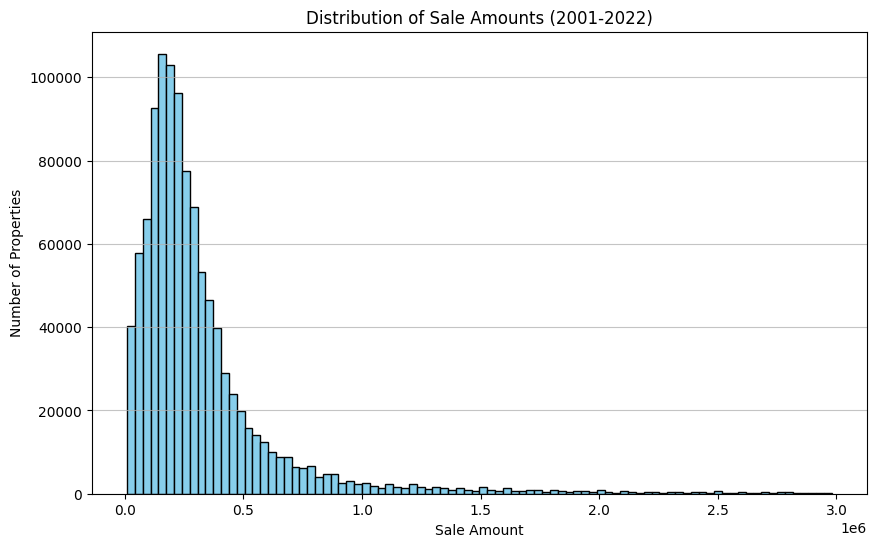

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_filtered["Sale Amount"], bins=90, color="skyblue", edgecolor="black")
plt.title("Distribution of Sale Amounts (2001-2022)")
plt.xlabel("Sale Amount")
plt.ylabel("Number of Properties")
plt.grid(axis="y", alpha=0.75)
plt.show()